Stationarity tests are starting..
p-value: 0.005437


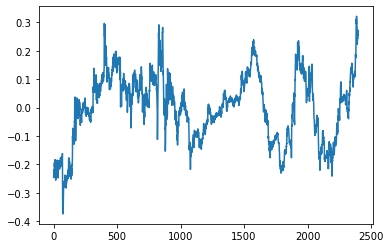

In [14]:
from binance import Client
import pandas as pd
from get_api_keys import *
import time
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

print('Stationarity tests are starting..')
df=pd.read_csv("High_correlated_pairs.csv")


# Options
backperiod='100'
pd.options.display.max_rows = 2100
pd.options.display.max_columns = 10
client = Client(api_key, api_secret)

pair1 = pd.DataFrame(client.get_historical_klines('MATICUSDT',
                                                  Client.KLINE_INTERVAL_1HOUR,
                                                  backperiod+" days ago ECT"))
pair1.columns = ["open_time", "Open", "High",
                 "Low", "Close", "Volume",
                 "close_time", "Quote_asset_volume",
                 "N_trades", "Taker_buy_base_asset_volume",
                 "taker_buy_quote_asset_volume", "ignore"]
pair1_exp = pair1[["Close"]]
    
pair2 = pd.DataFrame(client.get_historical_klines('ATOMUSDT',
                                                  Client.KLINE_INTERVAL_1HOUR,
                                                  backperiod+" days ago ECT"))
pair2.columns = ["open_time", "Open", "High",
                 "Low", "Close", "Volume",
                 "close_time", "Quote_asset_volume",
                 "N_trades", "Taker_buy_base_asset_volume",
                 "taker_buy_quote_asset_volume", "ignore"]
pair2_exp = pair2[["Close"]]
    
d = {'pair1': pair1_exp['Close'], 'pair2': pair2_exp['Close']}
mydata = pd.DataFrame(data=d)

mydata['pair1']=scale(mydata['pair1'])
mydata['pair2']=scale(mydata['pair2'])
mydata['diff'] = mydata['pair1']-mydata['pair2']
#print(mydata)

res = adfuller(mydata['diff'])
print('p-value: %f' % res[1])

plt.plot(mydata['diff'])
plt.show()
#     pvalues.append(res[1])
#     time.sleep(0.3)
# print('Stationarity tests just finished!')